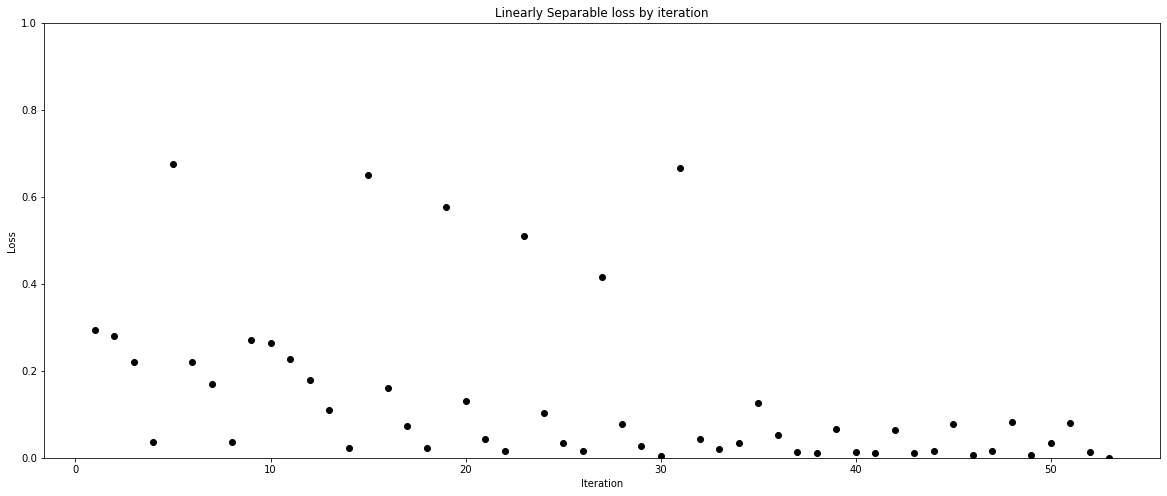

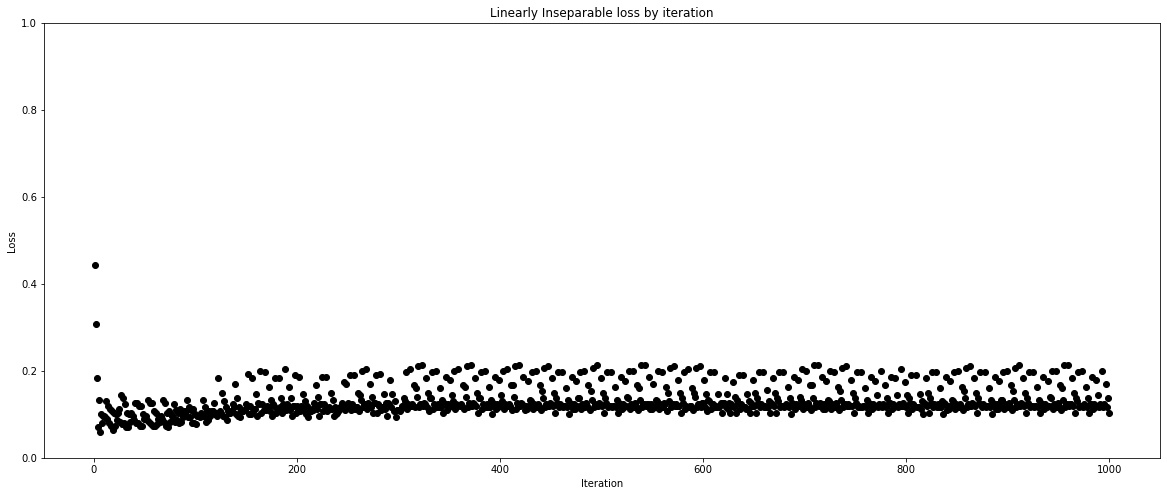

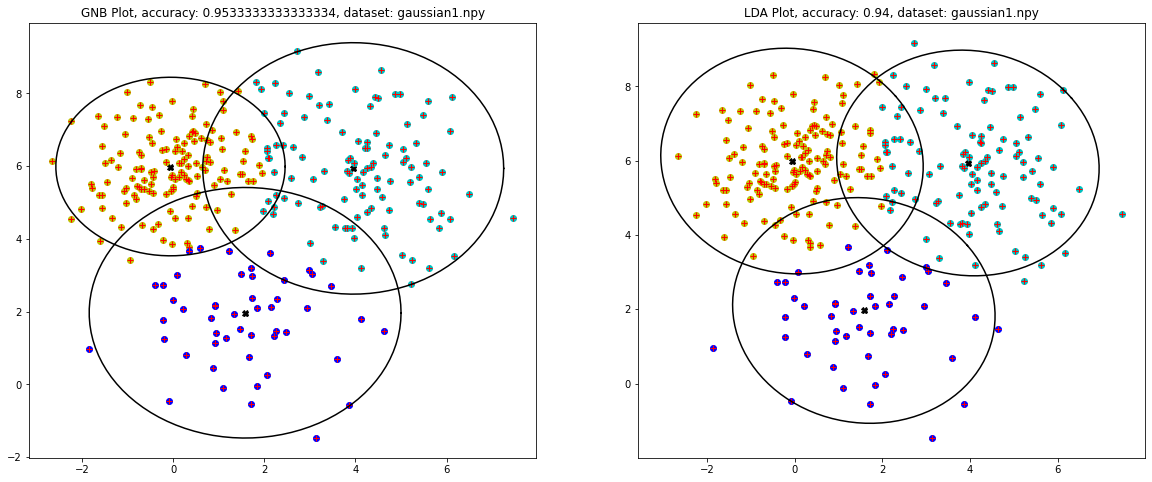

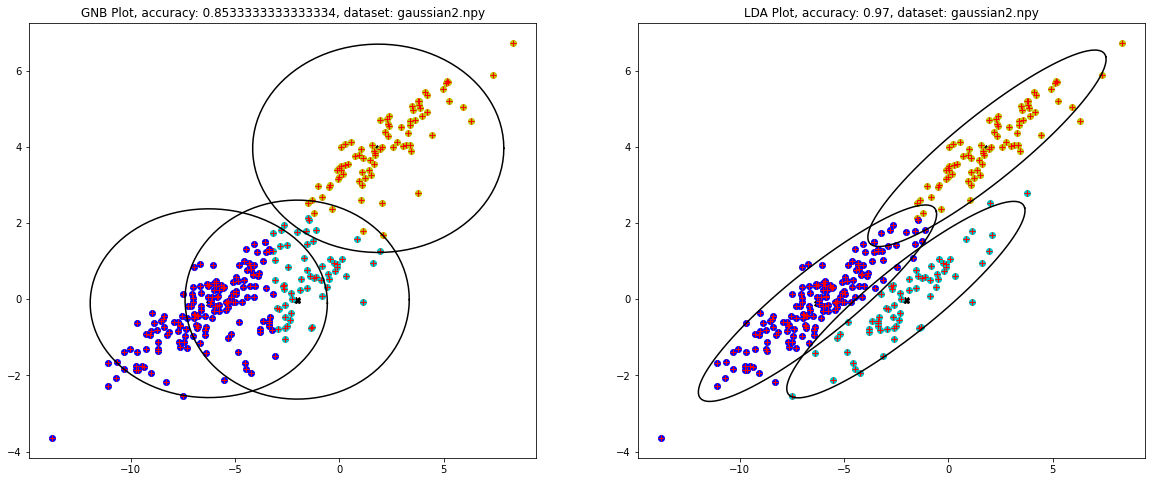

The estimated class probability of class 0: 0.25
The estimated class expectation of class 1: 3.5
The estimated variance of feature 1 in class 0: 0.33
The estimated variance of feature 1 in class 1: 0.33


C:\Users\Public\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:163: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [3]:
from IMLearn.learners.classifiers import Perceptron, LDA, GaussianNaiveBayes
from IMLearn.metrics import accuracy
import numpy as np
from typing import Tuple
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
pio.templates.default = "simple_white"
import matplotlib.pyplot as plt
import math


def load_dataset(filename: str) -> Tuple[np.ndarray, np.ndarray]:
    """
    Load dataset for comparing the Gaussian Naive Bayes and LDA classifiers. File is assumed to be an
    ndarray of shape (n_samples, 3) where the first 2 columns represent features and the third column the class

    Parameters
    ----------
    filename: str
        Path to .npy data file

    Returns
    -------
    X: ndarray of shape (n_samples, 2)
        Design matrix to be used

    y: ndarray of shape (n_samples,)
        Class vector specifying for each sample its class

    """
    arr = np.load(filename)
    X = arr[:,:2]
    y = arr[:,2] 
    
    return [X,y]
#     raise NotImplementedError()


def run_perceptron():
    """
    Fit and plot fit progression of the Perceptron algorithm over both the linearly separable and inseparable datasets

    Create a line plot that shows the perceptron algorithm's training loss values (y-axis)
    as a function of the training iterations (x-axis).
    """
    for n, f in [("Linearly Separable", "linearly_separable.npy"), ("Linearly Inseparable", "linearly_inseparable.npy")]:
        # Load dataset          
        X1,y1 = load_dataset(f'datasets/{f}')
#         raise NotImplementedError()

        # Fit Perceptron and record loss in each fit iteration
        loss_array = []
        def callback_loss(p: Perceptron,x: np.ndarray ,y: int):
            loss_array.append(p.loss(X1,y1))

        P = Perceptron(callback=callback_loss)
        P.fit(X1,y1)
#         raise NotImplementedError()

        # Plot figure
        loss_array = np.array(loss_array)
        x = np.linspace(1,len(loss_array),len(loss_array))
        
        plt.figure(figsize=(20,8))
        plt.plot(x, loss_array, 'o', color='black')
        plt.ylim([0, 1])
        plt.title(f'{n} loss by iteration')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.show()
#         raise NotImplementedError()


def compare_gaussian_classifiers():
    """
    Fit both Gaussian Naive Bayes and LDA classifiers on both gaussians1 and gaussians2 datasets
    """
    for f in ["gaussian1.npy", "gaussian2.npy"]:
        # Load dataset
        X,y = load_dataset(f'datasets/{f}')
#         raise NotImplementedError()

        # Fit models and predict over training set
        # Plot a figure with two suplots, showing the Gaussian Naive Bayes predictions on the left and LDA predictions
        # on the right. Plot title should specify dataset used and subplot titles should specify algorithm and accuracy
        from IMLearn.metrics import accuracy
        x = np.linspace(1,X.shape[0],X.shape[0])
        fig = plt.figure(figsize=(20,8))
        AX = [fig.add_subplot(122),fig.add_subplot(121)]
        
        for i in range(2):
            model = LDA() if i == 0 else GaussianNaiveBayes()
            model.fit(X,y)
            name = "LDA" if i==0 else "GNB"
            
            AX[i].title.set_text(f'{name} Plot, accuracy: {accuracy(y,model.predict(X))}, dataset: {f}')

            y_2 = X[np.where(model.predict(X)==2)]
            y_1 = X[np.where(model.predict(X)==1)]
            y_0 = X[np.where(model.predict(X)==0)]
            AX[i].plot(y_1[:, :1], y_1[:, 1:2], 'co')
            AX[i].plot(y_0[:, :1], y_0[:, 1:2], "yo")
            AX[i].plot(y_2[:, :1], y_2[:, 1:2], "bo")
            AX[i].plot(X[:, :1], X[:, 1:2], 'r+')
            
            if i==0: 
                for j in range(3): _plot_gaussian(AX[i],model.mu_.T[j],model.cov_,"k")
            else: 
                for j in range(3): _plot_gaussian(AX[i],model.mu_[j],model.vars_[j],"k")     
            
        plt.show()
        #         raise NotImplementedError()


def _plot_gaussian(plot,mean, covariance, color, zorder=0):
    """Plots the mean and 2-std ellipse of a given Gaussian"""
    plot.plot(mean[0], mean[1], color[0] + "X", zorder=zorder)

    if covariance.ndim == 1:
        covariance = np.diag(covariance)

    radius = np.sqrt(5.991)
    eigvals, eigvecs = np.linalg.eig(covariance)
    axis = np.sqrt(eigvals) * radius
    slope = eigvecs[1][0] / eigvecs[1][1]
    angle = 180.0 * np.arctan(slope) / np.pi

    
    u=mean[0]       #x-position of the center
    v=mean[1]     #y-position of the center
    a=axis[0]       #radius on the x-axis
    b=axis[1]   #radius on the y-axis
    t_rot=math.radians(angle)  #rotation angle

    t = np.linspace(0, 2*np.pi, 100)
    Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
         #u,v removed to keep the same center location
    R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  
         #2-D rotation matrix

    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])

    plot.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'black' )


if __name__ == '__main__':
    np.random.seed(0)
    run_perceptron()
    compare_gaussian_classifiers()
    
    gnb = GaussianNaiveBayes()
    #Q1
    S = np.array([(0,0),(1,0),(2,1),(3,1),(4,1),(5,1),(6,2),(7,2)])
    X = np.array([S[:,0]]).T
    y = S[:,1]
    print(f'The estimated class probability of class 0: {round(gnb.fit(X,y).pi_[0],2)}')
    print(f'The estimated class expectation of class 1: {round(gnb.fit(X,y).mu_[1][0],2)}')
    
    #Q2
    S = np.array([([1,1],0),([1,2],0),([2,3],1),([2,4],1),([3,3],1),([3,4],1)])
    y = S[:,1]
    X = []
    for i in S[:,0]:
        X.append(np.array(i))
    X = np.array(X)
    print(f'The estimated variance of feature 1 in class 0: {round(gnb.fit(X,y).vars_[1,0],2)}')
    print(f'The estimated variance of feature 1 in class 1: {round(gnb.fit(X,y).vars_[1,1],2)}')    

In [13]:
gnb = GaussianNaiveBayes()
S = np.array([([1,1],0),([1,2],0),([2,3],1),([2,4],1),([3,3],1),([3,4],1)])
y = S[:,1]
X = []
for i in S[:,0]:
    X.append(np.array(i))
X = np.array(X)

print(X)
print(y)

print(gnb.fit(X,y).mu_)
print(gnb.fit(X,y).vars_)

[[1 1]
 [1 2]
 [2 3]
 [2 4]
 [3 3]
 [3 4]]
[0 0 1 1 1 1]
[[1.  1.5]
 [2.5 3.5]]


C:\Users\Public\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


array([[0.5],
       [3.5],
       [6.5]])

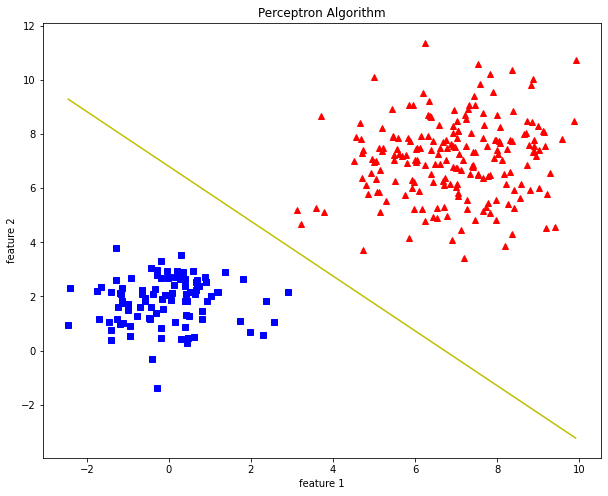

In [11]:
from IMLearn.learners.classifiers import Perceptron, LDA, GaussianNaiveBayes
import numpy as np
from typing import Tuple
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

for n, f in [("Linearly Separable", "linearly_separable.npy"), ("Linearly Inseparable", "linearly_inseparable.npy")]:
    if n=="Linearly Separable":
        arr1 = np.load(f'C:/Users/יותם אלפסי/Documents/GitHub/IML.HUJI/datasets/{f}')
        X1 = arr1[:,:2]
        y1 = arr1[:,2]
    else:
        arr2 = np.load(f'C:/Users/יותם אלפסי/Documents/GitHub/IML.HUJI/datasets/{f}')
        X2 = arr2[:,:2]
        y2 = arr2[:,2]
        
P = Perceptron()
P.fit(X1,y1)
        
def plot_decision_boundary(X, theta):
    
    # X --> Inputs
    # theta --> parameters
    
    # The Line is y=mx+c
    # So, Equate mx+c = theta0.X0 + theta1.X1 + theta2.X2
    # Solving we find m and c
    x1 = np.array([min(X[:,0]), max(X[:,0])])
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    
    y_1 = X[np.where(X[:,2]==1)]
    y_0 = X[np.where(X[:,2]==-1)]
    
    # Plotting
    fig = plt.figure(figsize=(10,8))
    plt.plot(y_1[:, :1], y_1[:, 1:2], "r^")
    plt.plot(y_0[:, :1], y_0[:, 1:2], "bs")
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Perceptron Algorithm')
    plt.plot(x1, x2, 'y-')
    
plot_decision_boundary(arr1, P.coefs_)

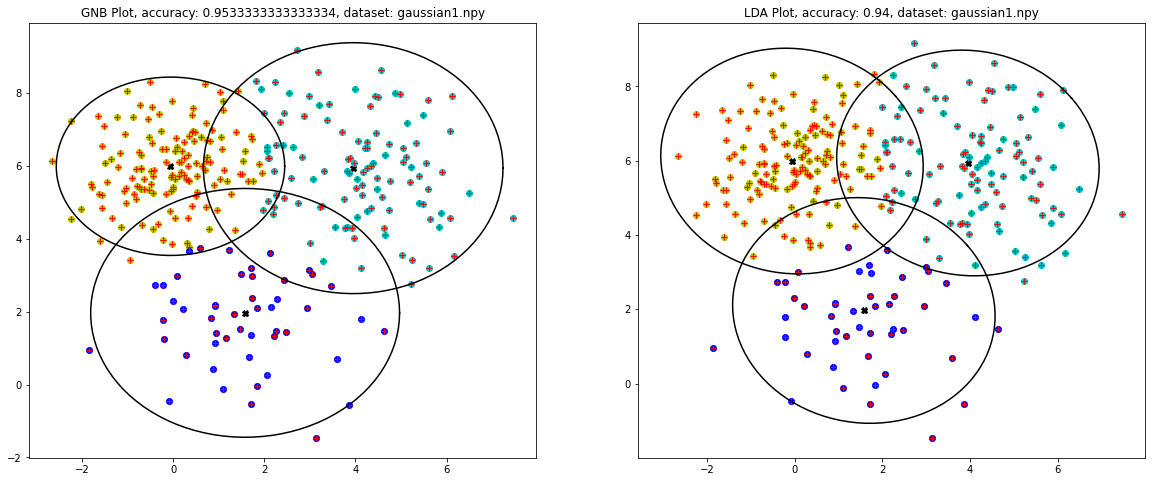

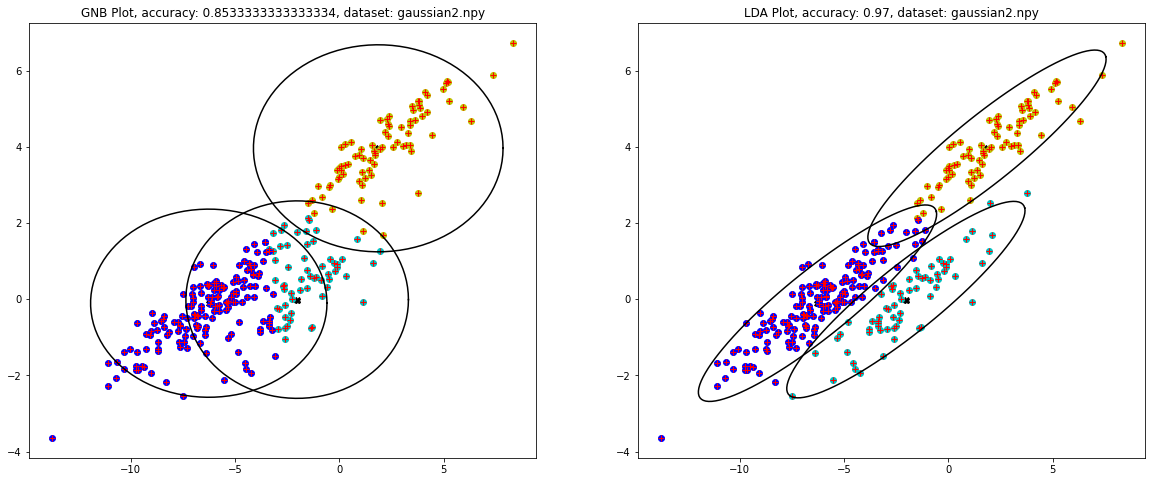

In [16]:
from IMLearn.learners.classifiers import Perceptron, LDA, GaussianNaiveBayes
import numpy as np
from typing import Tuple
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from IMLearn.metrics import accuracy

for f in ["gaussian1.npy", "gaussian2.npy"]:
    arr = np.load(f'C:/Users/יותם אלפסי/Documents/GitHub/IML.HUJI/datasets/{f}')
    X = arr[:,:2]
    y = arr[:,2]
    
    lda = LDA()
    lda.fit(X,y)
    lda.loss(X,y)
    gnb = GaussianNaiveBayes()
    gnb.fit(X,y)
    gnb.loss(X,y)
    
    x = np.linspace(1,X.shape[0],X.shape[0])
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(122)
    ax2 = fig.add_subplot(121)
#     ax.plot(x, lda.predict(X), '.', color='blue')
#     ax.plot(x, y, '+', color='red')
    ax.title.set_text(f'LDA Plot, accuracy: {accuracy(y,lda.predict(X))}, dataset: {f}')
#     ax2.plot(x, gnb.predict(X), '.', color='blue')
#     ax2.plot(x, y, '+', color='red')
    ax2.title.set_text(f'GNB Plot, accuracy: {accuracy(y,gnb.predict(X))}, dataset: {f}')
    
    y_2 = arr[np.where(lda.predict(X)==2)]
    y_1 = arr[np.where(lda.predict(X)==1)]
    y_0 = arr[np.where(lda.predict(X)==0)]
    ax.plot(y_1[:, :1], y_1[:, 1:2], 'co')
    ax.plot(y_0[:, :1], y_0[:, 1:2], "yo")
    ax.plot(y_2[:, :1], y_2[:, 1:2], "bo")
    ax.plot(arr[:, :1], arr[:, 1:2], 'r+')
    _plot_gaussian(ax,lda.mu_.T[0],lda.cov_,"k")
    _plot_gaussian(ax,lda.mu_.T[1],lda.fit(X,y).cov_,"k")
    _plot_gaussian(ax,lda.mu_.T[2],lda.cov_,"k")
    
    y_2 = arr[np.where(gnb.predict(X)==2)]
    y_1 = arr[np.where(gnb.predict(X)==1)]
    y_0 = arr[np.where(gnb.predict(X)==0)]
    ax2.plot(y_1[:, :1], y_1[:, 1:2], 'co')
    ax2.plot(y_0[:, :1], y_0[:, 1:2], "yo")
    ax2.plot(y_2[:, :1], y_2[:, 1:2], "bo")
    ax2.plot(arr[:, :1], arr[:, 1:2], 'r+')
    _plot_gaussian(ax2,gnb.mu_[0],gnb.vars_[0],"k")
    _plot_gaussian(ax2,gnb.mu_[1],gnb.vars_[1],"k")
    _plot_gaussian(ax2,gnb.mu_[2],gnb.vars_[2],"k")
    
#     arr[np.where(lda.predict(X)==2)]
#     plt.ylim([0,2])
#     plt.title("LDA (left) and GNB (right) prediction vs true lables")
#     plt.xlabel('samples')
#     plt.ylabel('Class')
    plt.show()

In [15]:
from matplotlib.patches import Ellipse
import math
def _plot_gaussian(plot,mean, covariance, color, zorder=0):
    """Plots the mean and 2-std ellipse of a given Gaussian"""
    plot.plot(mean[0], mean[1], color[0] + "X", zorder=zorder)

    if covariance.ndim == 1:
        covariance = np.diag(covariance)

    radius = np.sqrt(5.991)
    eigvals, eigvecs = np.linalg.eig(covariance)
    axis = np.sqrt(eigvals) * radius
    slope = eigvecs[1][0] / eigvecs[1][1]
    angle = 180.0 * np.arctan(slope) / np.pi

    
    u=mean[0]       #x-position of the center
    v=mean[1]     #y-position of the center
    a=axis[0]       #radius on the x-axis
    b=axis[1]   #radius on the y-axis
    t_rot=math.radians(angle)  #rotation angle

    t = np.linspace(0, 2*np.pi, 100)
    Ell = np.array([a*np.cos(t) , b*np.sin(t)])  
         #u,v removed to keep the same center location
    R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  
         #2-D rotation matrix

    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])

    plot.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'black' )